In [1]:

!pip install Jinja2
!pip install markupsafe==2.0.1
!pip install yellowbricks



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# **Lung Cancer Data**

In [39]:
lung_df = pd.read_csv('/content/newLung_converted_codetime.csv')

In [40]:
lung_df.head()

,code,order,pid,cancer,days
0,A01,1,1203,1,-456
1,A01,1,2526,0,-181
2,A01,1,5283,0,-292
3,A01,1,8688,0,-476
4,A01,1,2242,0,-615


In [41]:
lung_df.fillna(0)

,code,order,pid,cancer,days
0,A01,1,1203,1,-456
1,A01,1,2526,0,-181
2,A01,1,5283,0,-292
3,A01,1,8688,0,-476
4,A01,1,2242,0,-615
...,...,...,...,...,...
29755,Z29,1,2407,0,-539
29756,Z29,1,4991,1,-606
29757,Z29,1,4589,0,-187
29758,Z29,1,1147,0,-572


In [42]:
lung_df.columns

Index(['code', 'order', 'pid', 'cancer', 'days'], dtype='object')

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


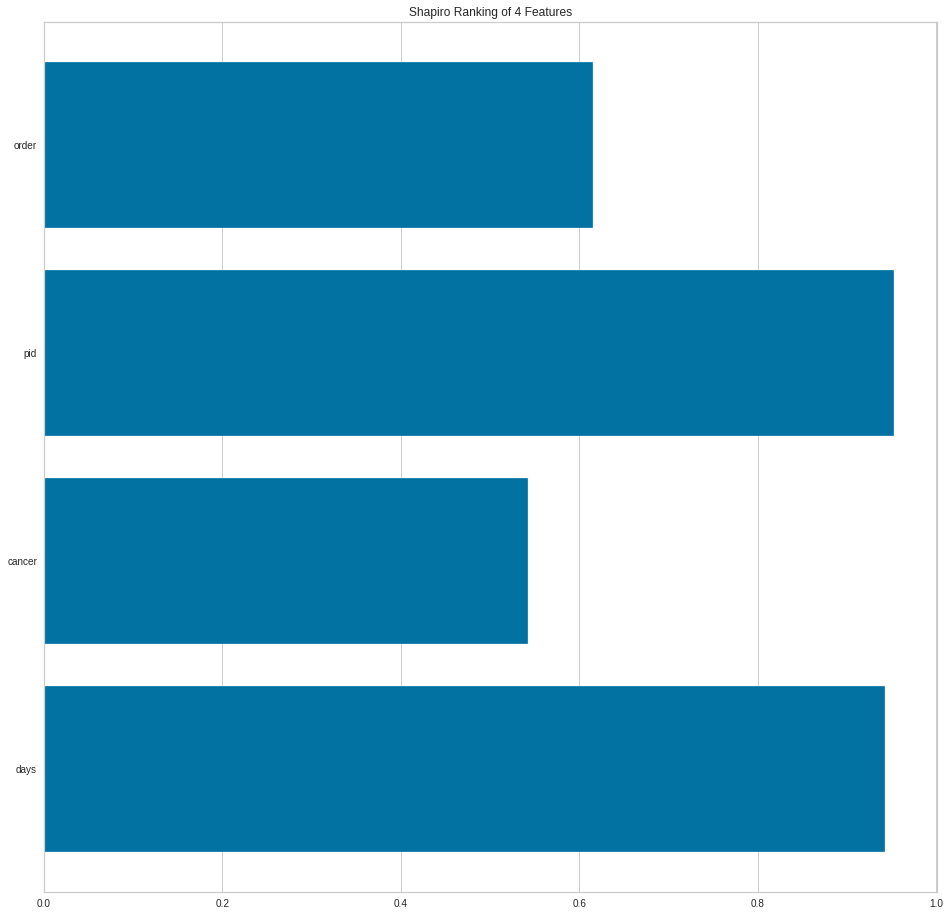

In [50]:
from yellowbrick.features import Rank1D

X = lung_df[['order', 'pid', 'cancer', 'days']].sample(frac=0.25)
y = lung_df[['order', 'pid', 'cancer', 'days']].sample(frac=0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(figsize=(16,16))

visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

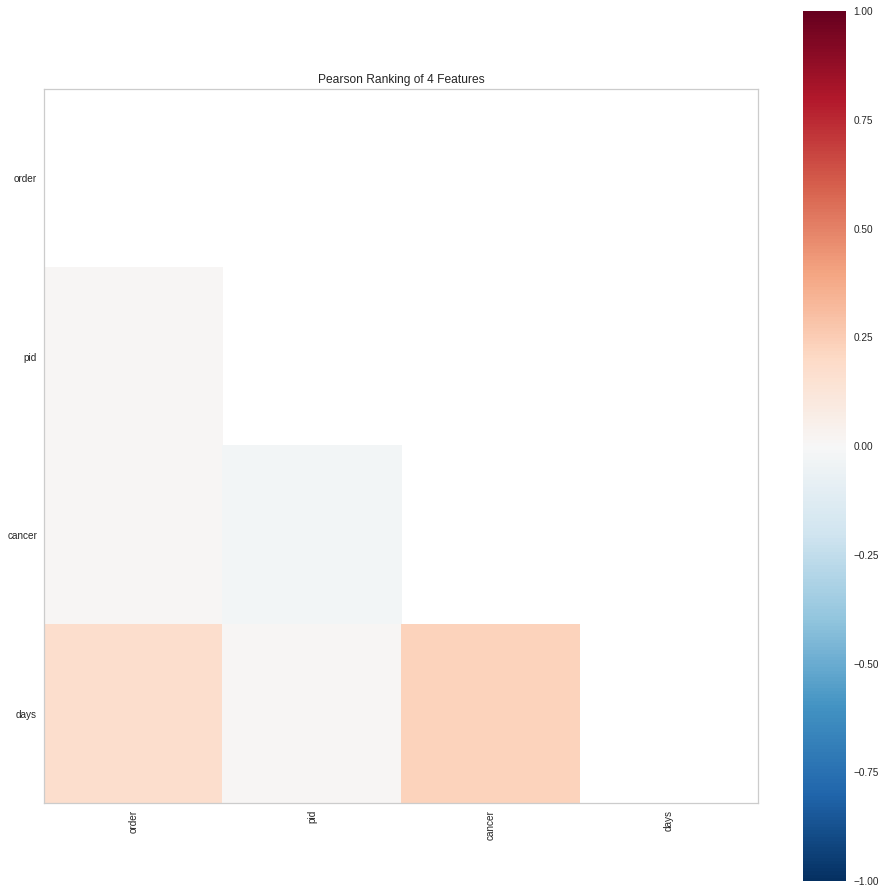

In [51]:
from yellowbrick.features import Rank2D

X = lung_df[['order', 'pid', 'cancer', 'days']].sample(frac=0.25)
y = lung_df[['order', 'pid', 'cancer', 'days']].sample(frac=0.25)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(figsize=(16,16))

visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure


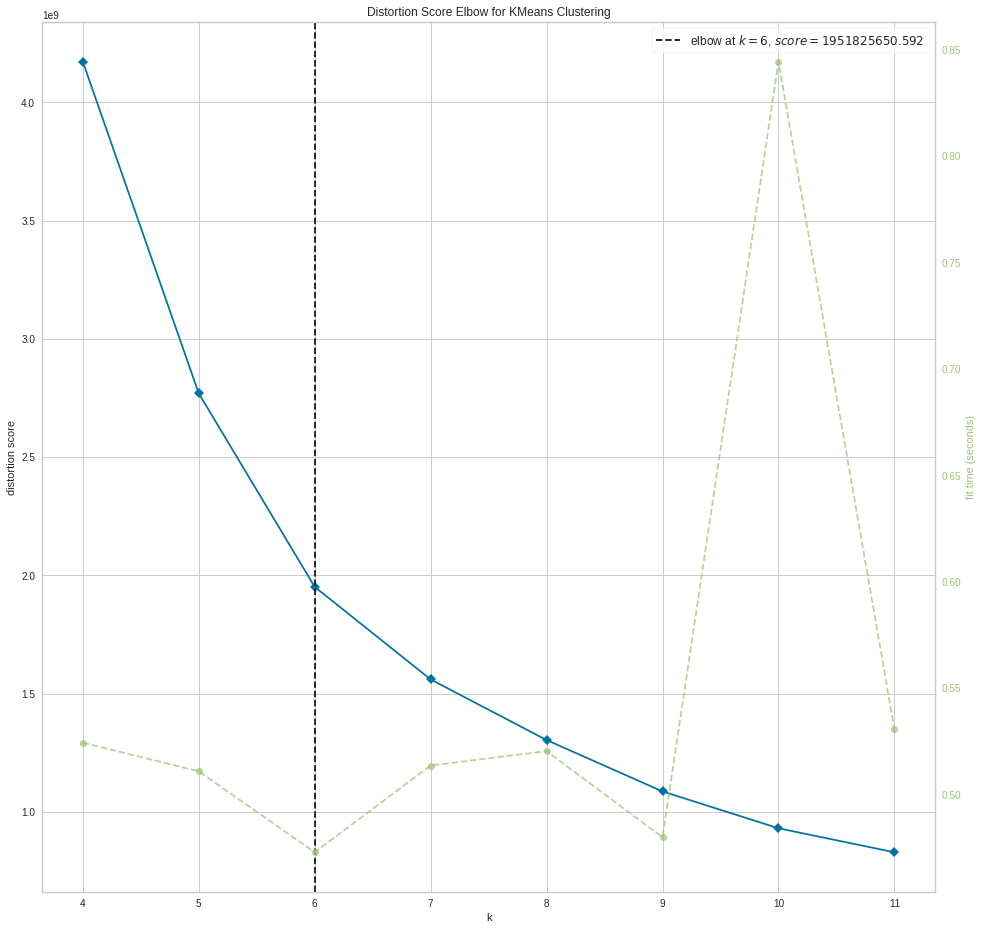

In [95]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

X = lung_df[['order', 'pid', 'cancer', 'days']].sample(frac=0.25)
y = lung_df[['order', 'pid', 'cancer', 'days']].sample(frac=0.25)

plt.figure(figsize=(16,16))


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

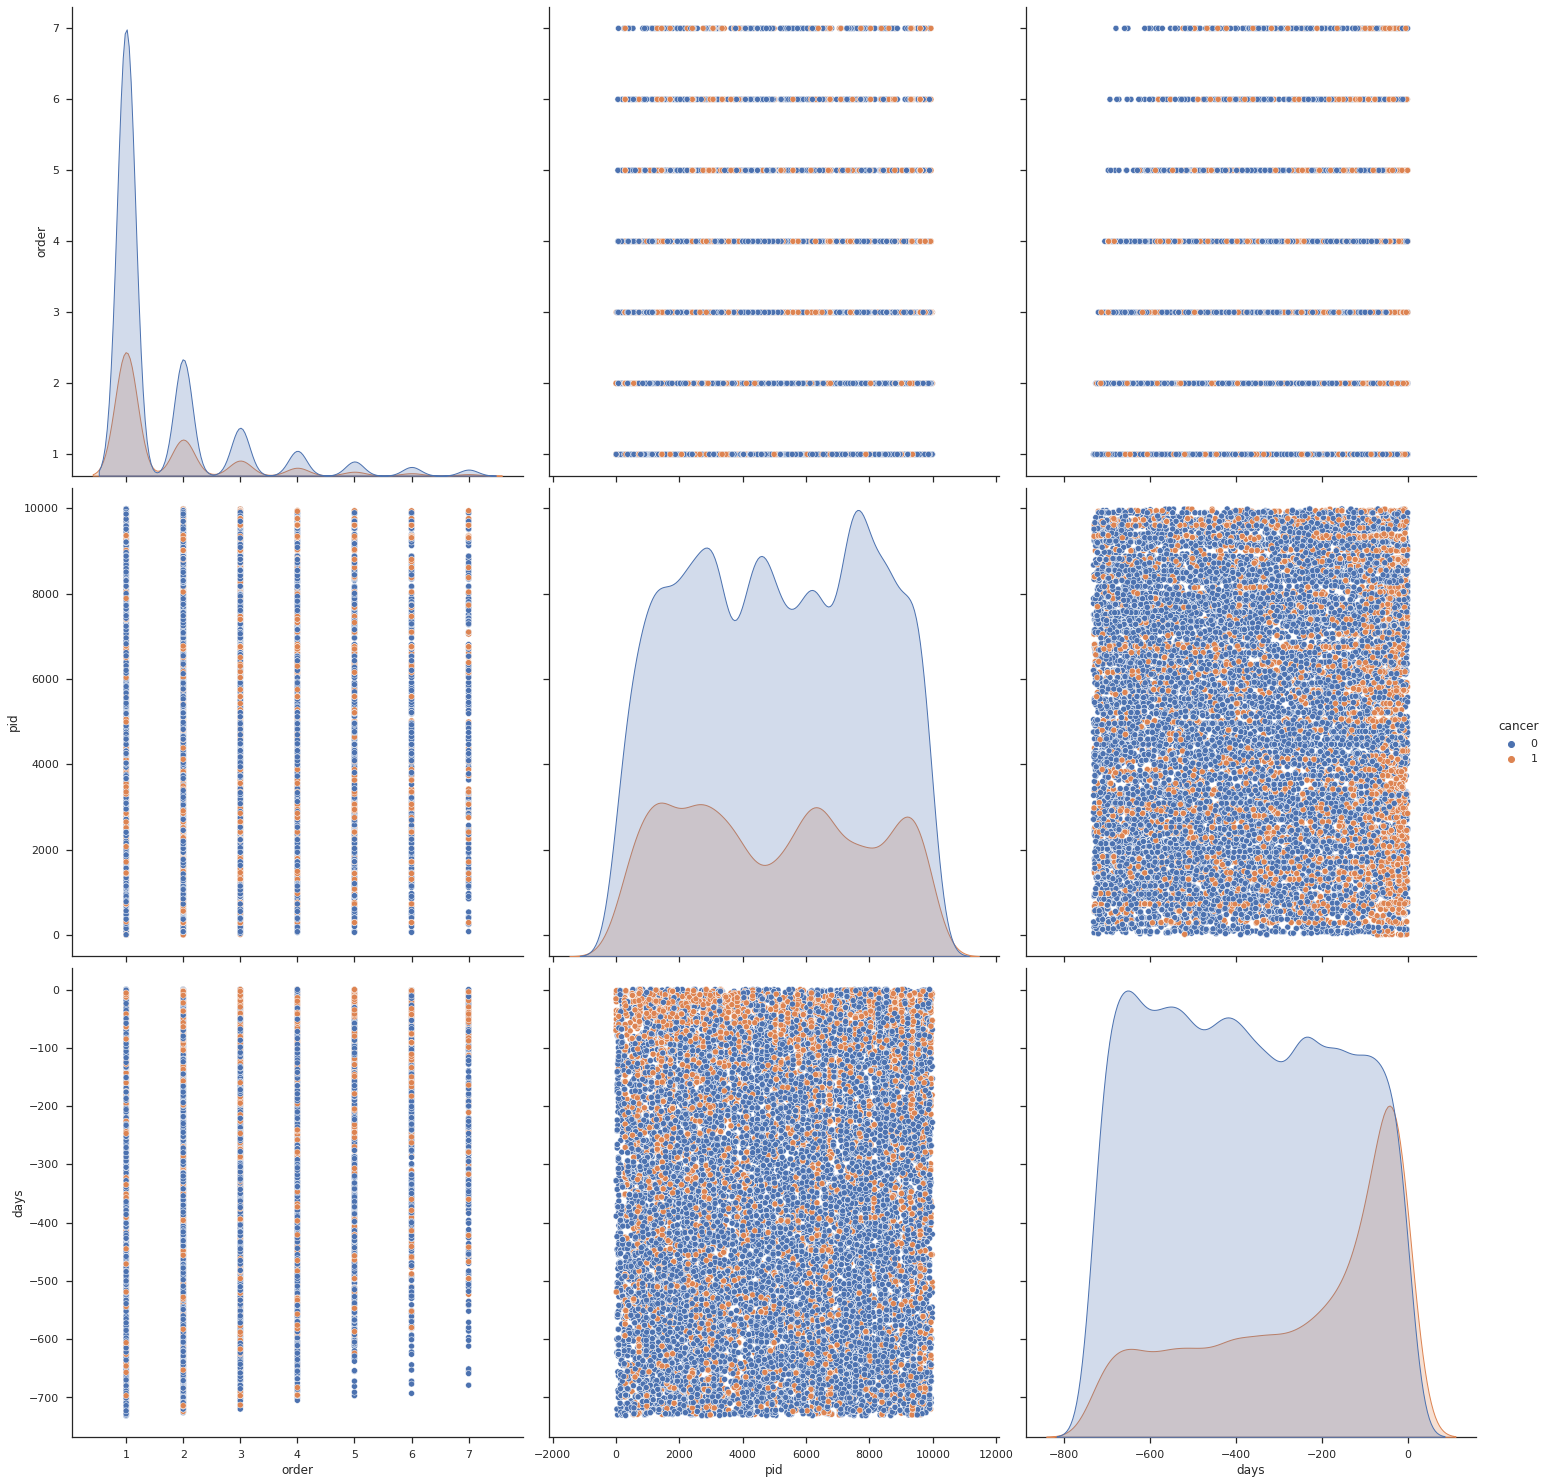

In [104]:
sns.set_theme(style="ticks")
sns.pairplot(lung_df, hue="cancer", height=7)



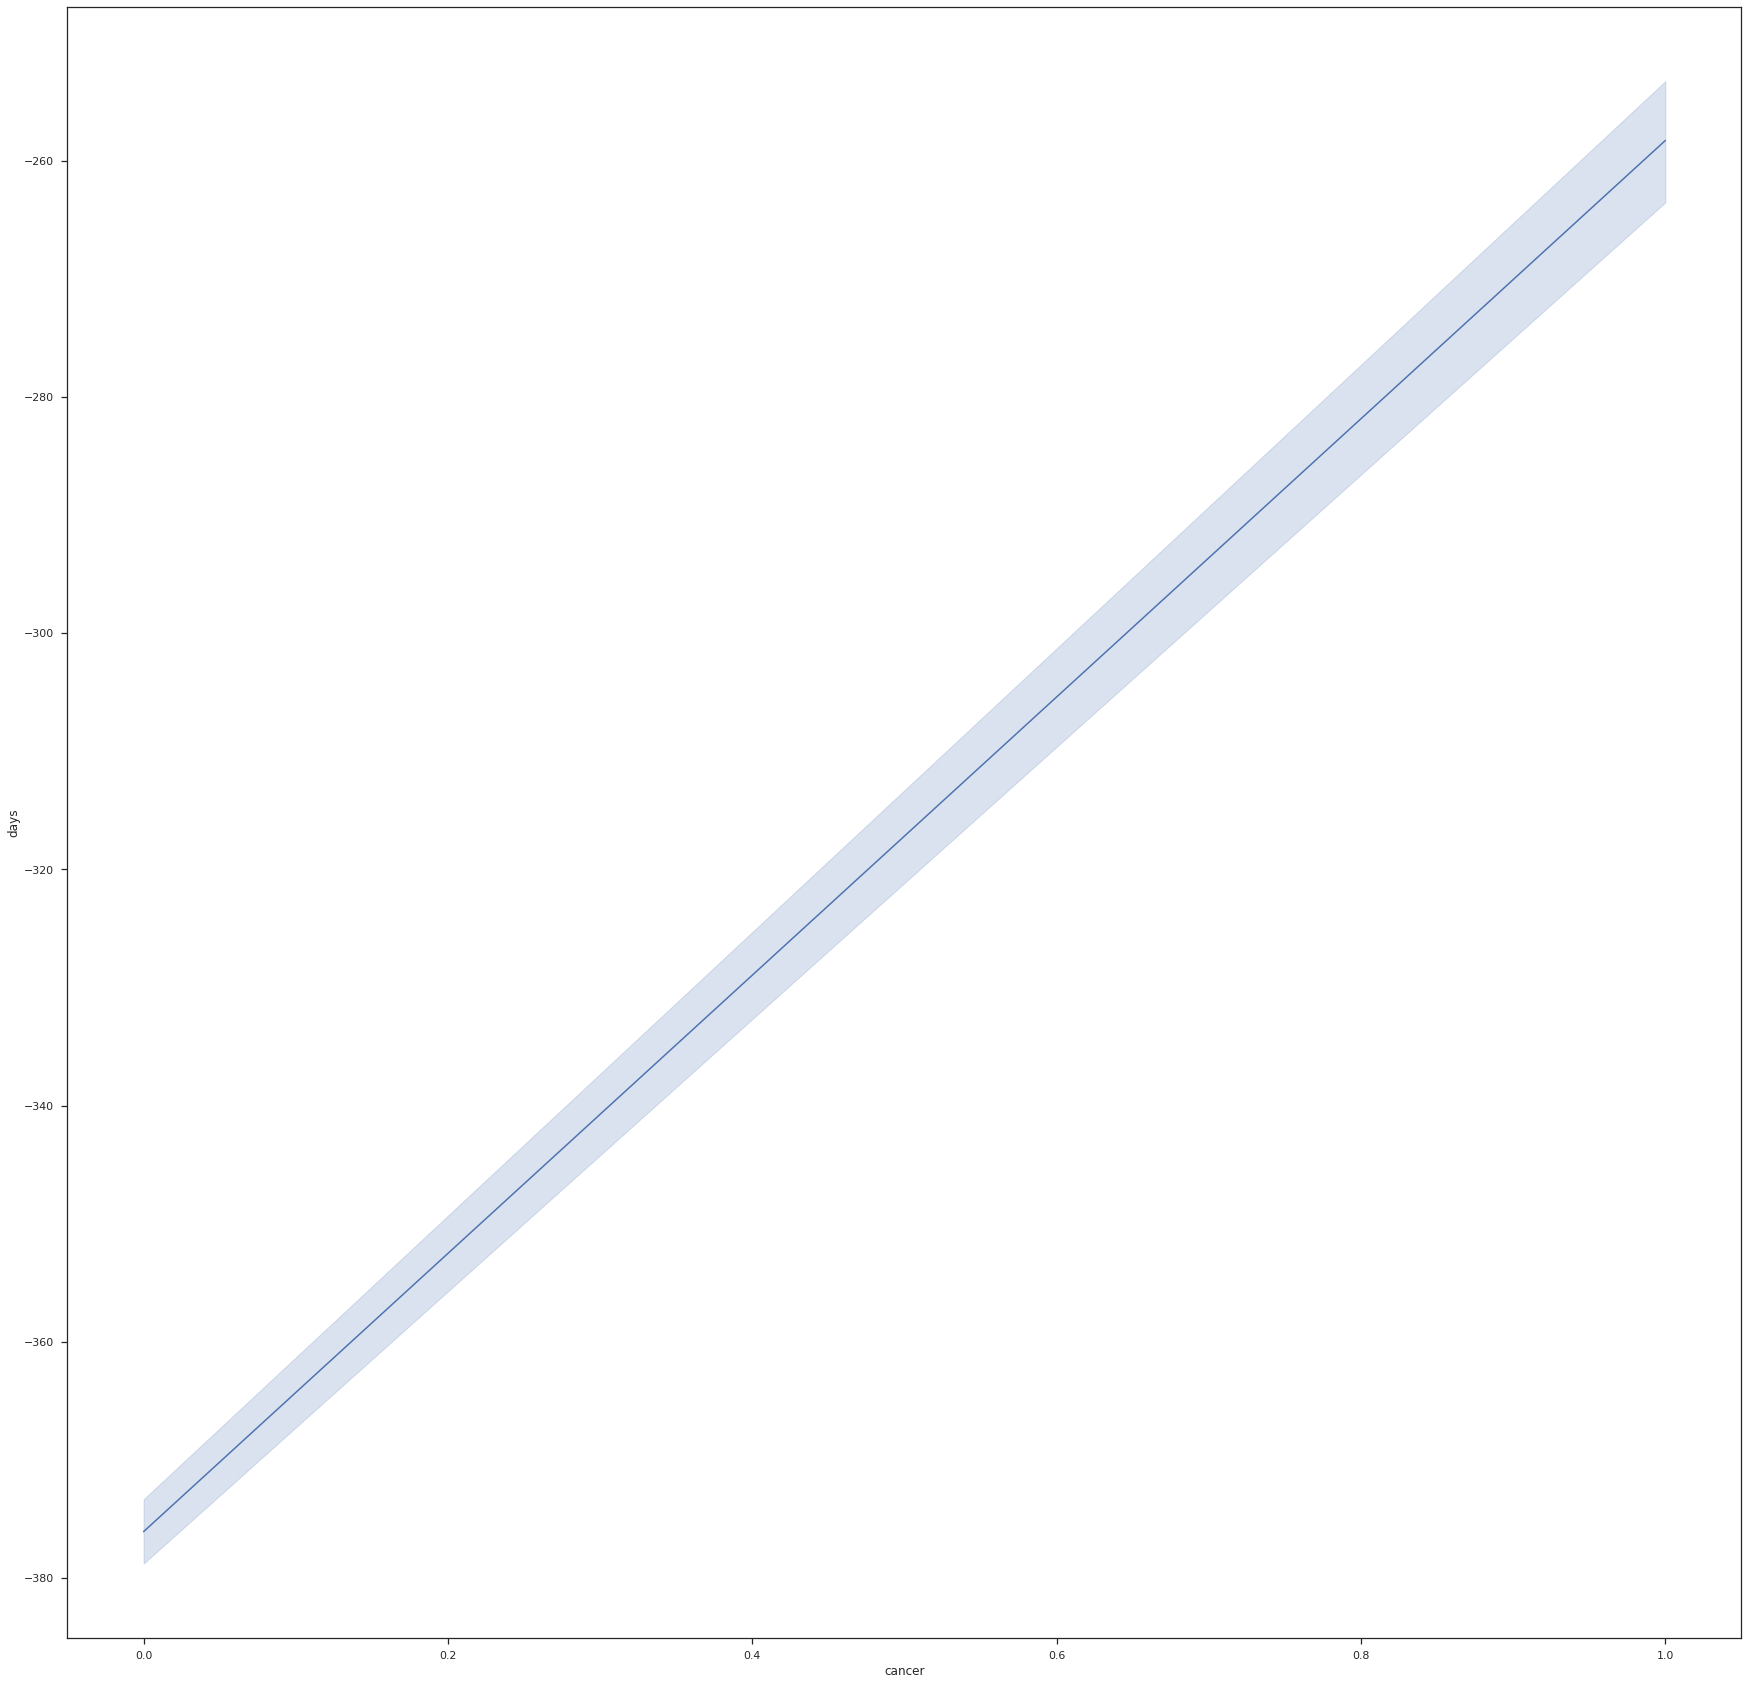

In [107]:
sns.lineplot(data=lung_df, x="cancer", y="days")

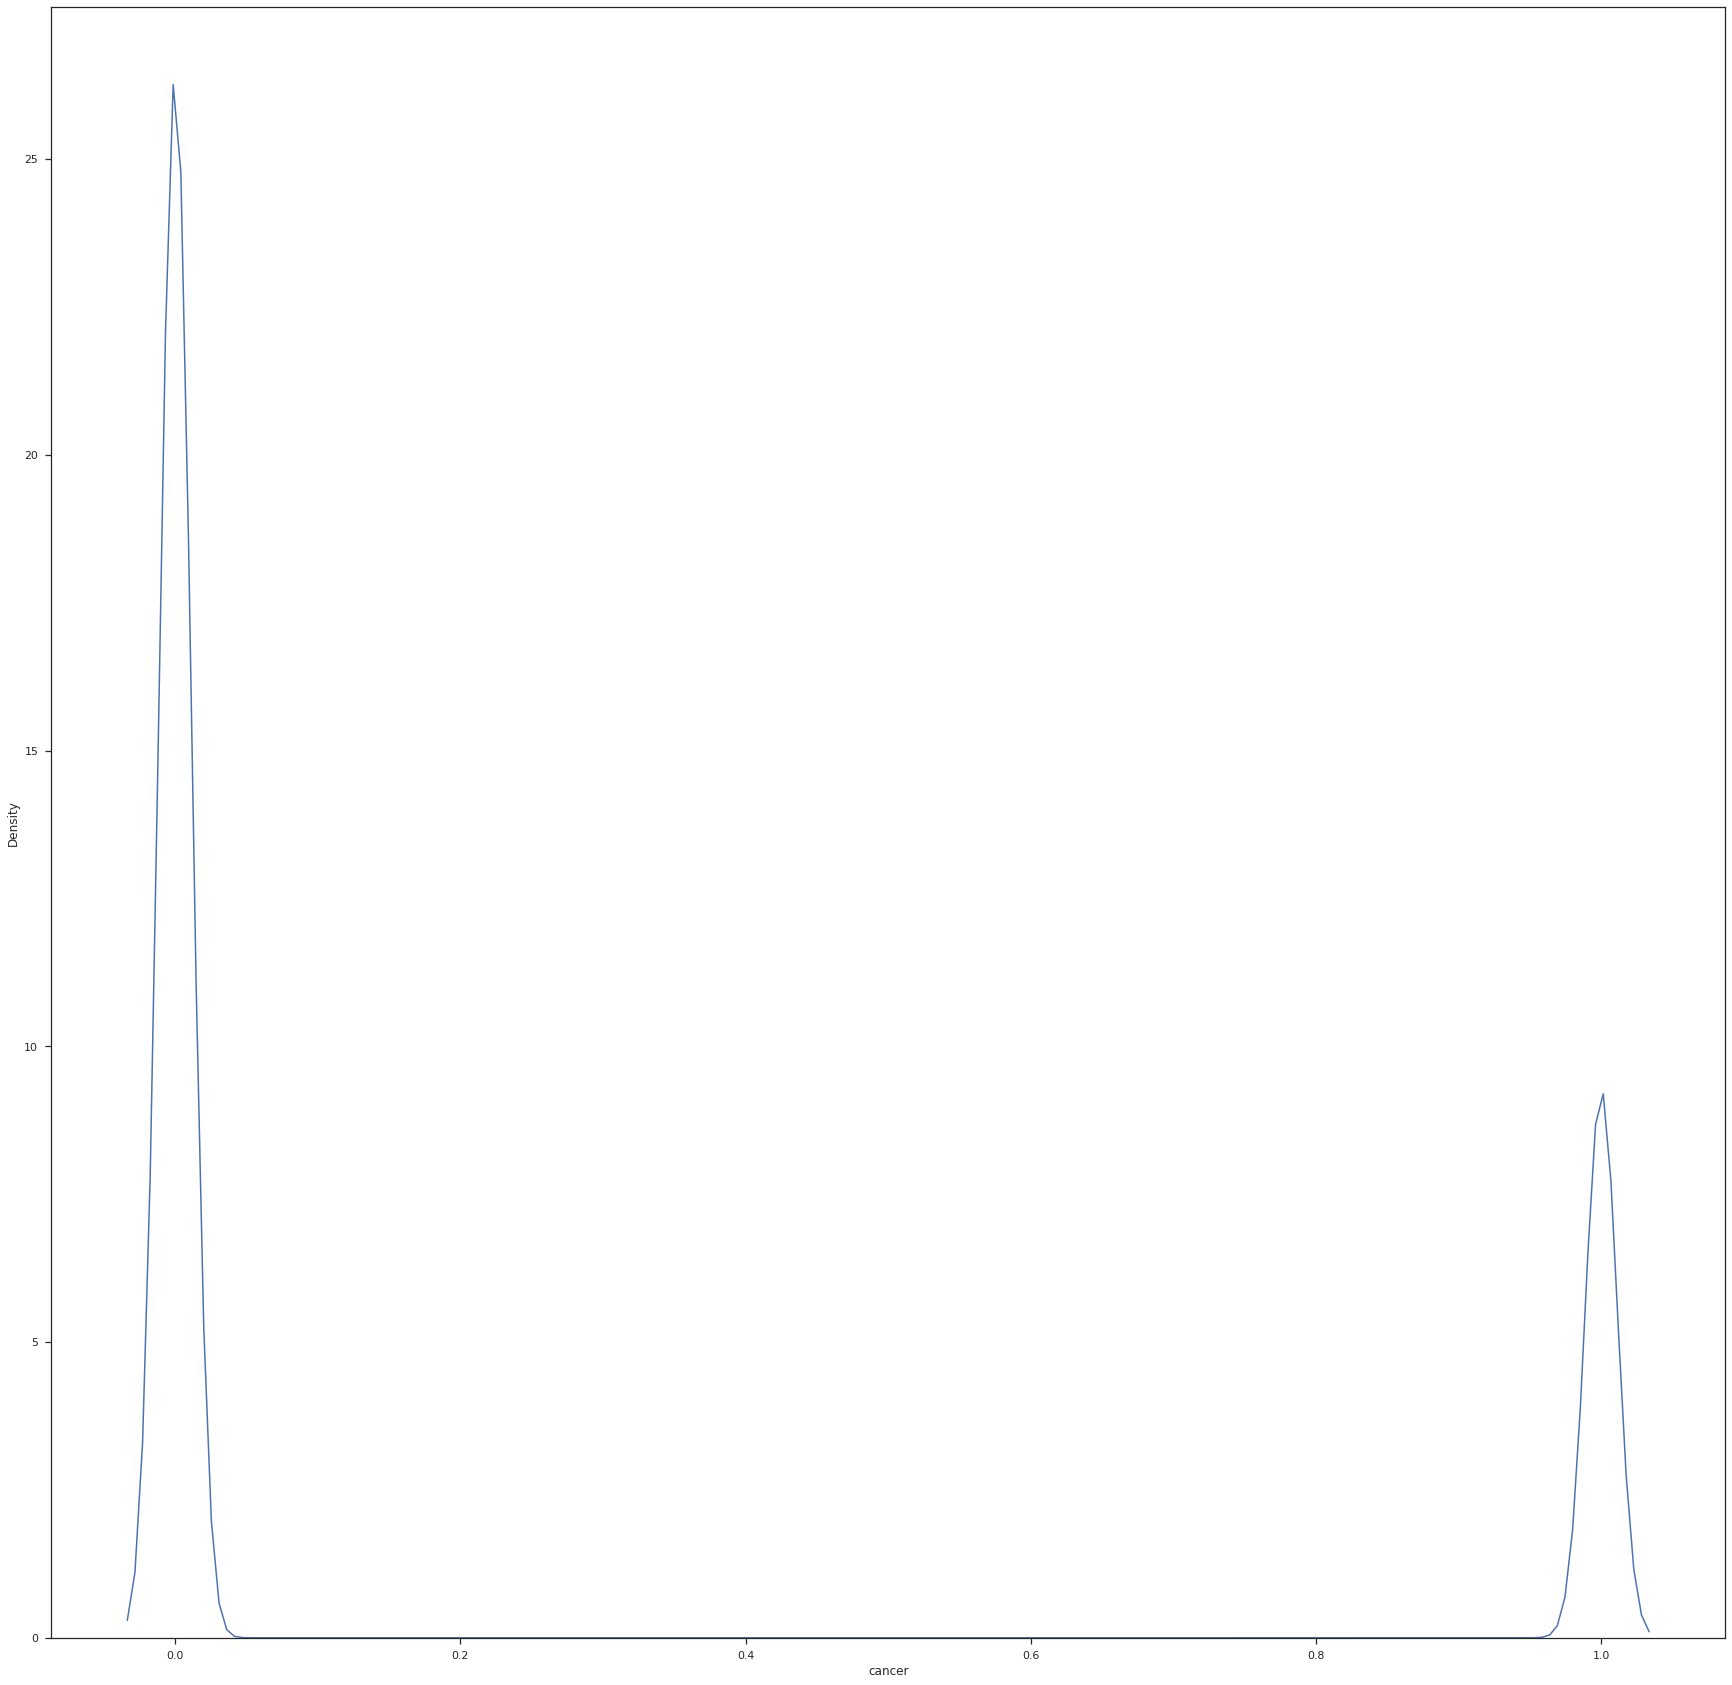

In [115]:
sns.kdeplot(data=lung_df, x="cancer", bw_adjust=.2)